In [1]:
import pandas as pd

# Visualisierungen
In dieser Lektionen sollen grundliegende **Visualisierungsmöglichkeiten** mit Pandas aufgezeigt werden. Panda besitz einige Diagrammtypen die zur schnellen Überprüfung von Daten bestens geeignet sind. Natürlich gibt es außerdem die Möglichkeit komplexere Grafiken aus den Daten zu erstellen, wobei es hierbei weiterer Bibliotheken bedarf. 

--> *Mehr Informationen zu weitern Visualisierungsmöglichkeiten finden sich im Abschnitt "Tipps and Tricks"*

In [26]:
# Größeres Datenset einlesen
df = pd.read_csv('../src/bigdata/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# BuildIn Diagramme
## Das Linien Diagramm

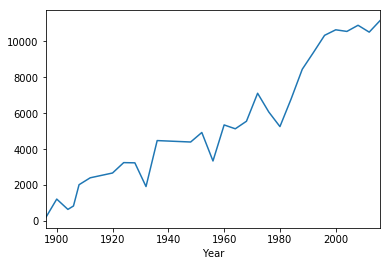

In [115]:
# Hier wollen wir die Anzahl der Teilnehmer pro Jahr (Sommerspiele) mit einem Linien Diagramm darstellen
df_teilnehmer = df.drop_duplicates(['ID', 'Year'])
df_teilnehmer = df_teilnehmer[df_teilnehmer['Season'] == 'Summer']

# funktioniert auch mit einer Series
df_teilnehmer.groupby('Year').size().plot()

In [124]:
# Schauen wir uns die Verteilung zwischen Frauen und Männern an
df_teilnehmer_mw = df_teilnehmer.groupby(['Year', 'Sex']).size()
df_teilnehmer_mw.head(10)

Year  Sex
1896  M       176
1900  F        23
      M      1201
1904  F         6
      M       644
1906  F         6
      M       835
1908  F        44
      M      1980
1912  F        53
dtype: int64

In [128]:
# Möchte das Geschlecht(Sex) als Spalte haben. Dafür benutzen wir unstack() 
df_teilnehmer_mw.unstack().head()

Sex,F,M
Year,,
1896,NaN,176.0
1900,23.0,1201.0
1904,6.0,644.0
1906,6.0,835.0
1908,44.0,1980.0


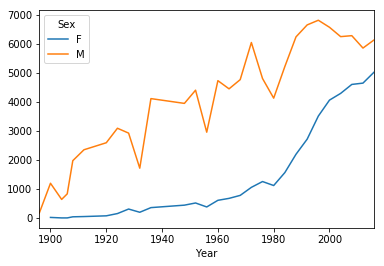

In [130]:
# Nun können wir die Daten dementsprechend plotten mit plot
df_teilnehmer_mw.unstack().plot()

## Das Histogramm

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235325F7630>]],
      dtype=object)

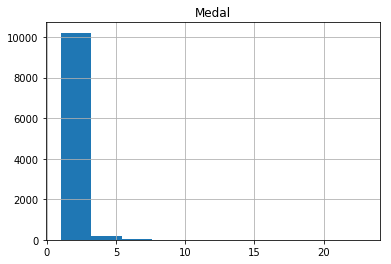

In [49]:
# Im folgenden Abschnitt wollen wir ein Histogramm erstellen, indem dargestellt wird wie oft ein beliebiger Teilnehmer Gold gewonnen hat.
df_gold = df[df['Medal'] == 'Gold']
df_gold = df_gold[['ID', 'Medal', 'Name']].groupby(['ID', 'Name']).count()
df_gold.hist(['Medal'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023532598D30>]],
      dtype=object)

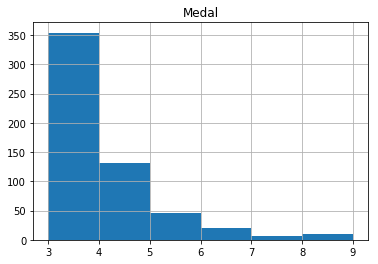

In [48]:
# Feineinstellungen, Einteilung des Histogramms
df_gold.hist(['Medal'], bins=range(3,10,1))

# Der BoxPlot
Mit dem BoxPlot lassen sich sofort folgende statistische Werte ablesen:
* Minimum und Maximum
* Mittelwert und Median
* oberes und unteres Quantil
* Ausreißer

In [39]:
# Im folgenden wird die Verteilung von Gewicht, Alter und Größe der weiblichen Teilnehmerinnen betrachtet
df_weiblich= df[df['Sex'] == 'F']
df_weiblich.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
224316,112678,Aleksandra Anna Socha (-Szelagowski),F,22.0,174.0,66.0,Poland,POL,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Women's Sabre, Individual",NaN
107467,54315,"Joanne Loraine ""Jo"" Jennings (-Steele)",F,18.0,174.0,60.0,Great Britain,GBR,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's High Jump,NaN
30586,15765,Caroline Brunet,F,31.0,175.0,70.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Canoeing,"Canoeing Women's Kayak Doubles, 500 metres",NaN
205516,103178,Shona Rubens,F,23.0,170.0,78.0,Canada,CAN,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Women's Giant Slalom,NaN
231771,116267,Liisa Helena Suihkonen,F,24.0,159.0,54.0,Finland,FIN,1968 Winter,1968,Winter,Grenoble,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN


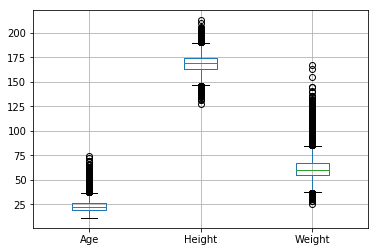

In [54]:
# Achtung noch können Teilnehmerinnen doppelt vorkommen
df_weiblich = df_weiblich.drop_duplicates(subset=['ID']).sort_values('Name')
df_weiblich.boxplot(['Age', 'Height', 'Weight'])

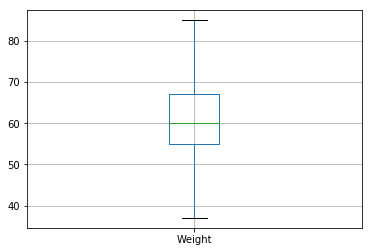

In [78]:
# ohne Extremwerte
df_weiblich.boxplot(['Weight'], showfliers=False)

## Subplots
Subplot ermöglichen mehrere kleine Grafiken in einer Reihe

In [67]:
# Zunächst muss matplotlib as import hinzugefügt werden
import matplotlib.pyplot as plt

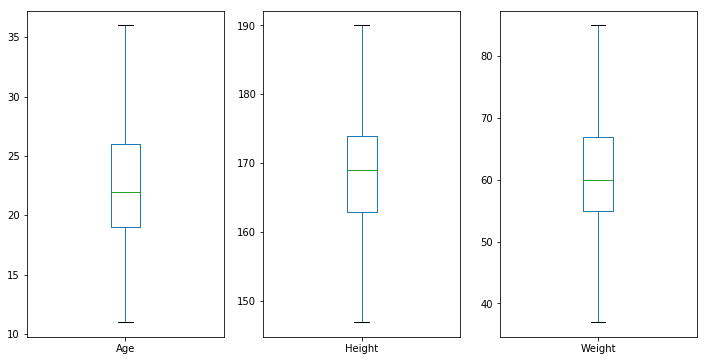

In [108]:
# Als nächstes erstellen wir ein Layout mit subplots (RowCount, ColumnCount), entfernen das Grid und die Outliners
fig, ax = plt.subplots(1,3, figsize=(12, 6))

# Verwenden des jeweiligen slots über ax[1-3] 
df_weiblich.boxplot(['Age'], ax=ax[0], showfliers=False, grid=False)
df_weiblich.boxplot(['Height'], ax=ax[1], showfliers=False, grid=False)
df_weiblich.boxplot(['Weight'], ax=ax[2], showfliers=False, grid=False)

### Zusatzinformation - Mehr Einstellungen
Es gibt viele Einstellungen die vorgenommen werden können. Exemplarisch wurde dies am BoxPlot gezeigt. Hinter der boxplot, so wie hinter allen Grafiken die mit Pandas erstellt werden können, verbirgt sich die Bibliothek Matplotlib. Daher können wir alle Paramter dieser Bibliothek nutzen. 

*Beispiel:*
```python
df_weiblich.boxplot(['Weight'], ax=ax[2], showfliers=False, grid=False)
```

Der Parameter **ax** und **grid** ist aus der Dokumentation der Pandabibliothek zu entnehmen und der Parameter **showfliers** aus Matplot selber.

* Pandas - boxplot: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot
* Matplot - boxplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot


# Tipps and Tricks

### Guide durch die Visualisierungsmöglichkeiten mit Pandas
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### Weiter Bibliotheken für Visualisierungen
* Bokeh -   https://bokeh.pydata.org/en/latest/index.html
* PyPlot -  https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html
* Seaborn - https://seaborn.pydata.org/

